In [12]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt 
import pandas_datareader as web
import datetime as dt 

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [13]:
crypto_currency = 'BNB'
against_currency ='USD'

In [14]:
start = dt.datetime(2021,1,1)
end = dt.datetime.now()

In [15]:
data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start, end)

In [16]:
# Prepare Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [17]:
range(prediction_days, len(scaled_data))

range(60, 153)

In [18]:
y_train

array([0.34035901, 0.31669114, 0.31914894, 0.30168668, 0.29608984,
       0.29655089, 0.31771992, 0.31793839, 0.40119687, 0.37909909,
       0.3954435 , 0.35454635, 0.37400229, 0.35603611, 0.34040742,
       0.34579643, 0.36421102, 0.3514428 , 0.35512853, 0.35620048,
       0.35642686, 0.34234906, 0.34201924, 0.33287273, 0.30942647,
       0.3411026 , 0.36303207, 0.36317144, 0.37260786, 0.42933886,
       0.41467034, 0.46660364, 0.47254878, 0.44767958, 0.49231458,
       0.51761287, 0.57372726, 0.52840126, 0.59636152, 0.65141343,
       0.68177787, 0.76453607, 0.87942902, 0.80245035, 0.80245866,
       0.79155519, 0.74077736, 0.75675172, 0.69505344, 0.73274478,
       0.86110943, 0.79686842, 0.73418621, 0.76638422, 0.71914969,
       0.73271992, 0.77893686, 0.83203476, 0.82288879, 0.88097042,
       0.91915578, 0.91174034, 0.91605453, 1.        , 0.89897705,
       0.96236713, 0.93356862, 0.91991204, 0.95365364, 0.97892004,
       0.9305475 , 0.9947515 , 0.86292057, 0.83667827, 0.88633

In [19]:
#creating neural netowrk
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=25, batch_size=32)

Epoch 1/25
3/3 [==============================] - 5s 84ms/step - loss: 0.3494
Epoch 2/25
3/3 [==============================] - 0s 99ms/step - loss: 0.1518
Epoch 3/25
3/3 [==============================] - 0s 62ms/step - loss: 0.0573
Epoch 4/25
3/3 [==============================] - 0s 58ms/step - loss: 0.0639
Epoch 5/25
3/3 [==============================] - 0s 57ms/step - loss: 0.0347
Epoch 6/25
3/3 [==============================] - 0s 56ms/step - loss: 0.0405
Epoch 7/25
3/3 [==============================] - 0s 61ms/step - loss: 0.0419
Epoch 8/25
3/3 [==============================] - 0s 62ms/step - loss: 0.0292
Epoch 9/25
3/3 [==============================] - 0s 69ms/step - loss: 0.0318
Epoch 10/25
3/3 [==============================] - 0s 68ms/step - loss: 0.0350
Epoch 11/25
3/3 [==============================] - 0s 70ms/step - loss: 0.0347
Epoch 12/25
3/3 [==============================] - 0s 89ms/step - loss: 0.0327
Epoch 13/25
3/3 [==============================] - 0s 71ms/st

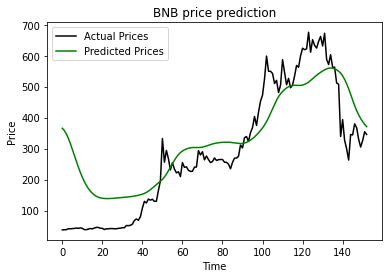

In [20]:
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)
model_inputs = total_dataset[len(total_dataset) - len(test_data)-prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices) 
plt.plot(actual_prices,color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [21]:
# Predict Next Day
real_data = [model_inputs[len(model_inputs) +1 - prediction_days: len(model_inputs) + 1,0]]
real_data = np.reshape(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print()

TypeError: _reshape_dispatcher() missing 1 required positional argument: 'newshape'